## . 목표! : 
- 타이타닉 데이터를 활용하여 생존자와 사망자를 예측해보자
- kaggle 경진대회에 참가하여 우리 점수를 확인해보자!
- 머신러닝의 전체과정을 체험해보자

## . 머신러닝 과정
1. 문제정의: 목표 설정, 어떤 모델
2. 데이터 수집: 분류를 할거라면 class로 담긴 레이블 있는 데이터 수집
3. 데이터 전처리 : 머신러닝의 학습을 위해 이상치나 결측치를 처리하는 과정
4. 데이터 탐색: 기술통계, 특성간의 관계
5. 모델 선택 및 하이퍼 파라미터 설정
6. 모델 예측 및 평가
7. 모델 서비스 화

## . 임포트하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns # 시각화 라이브러리
# train, test 분리하는 도구
from sklearn.model_selection import train_test_split
# 평가 도구
from sklearn.metrics import accuracy_score
# tree model - 사망/ 생존 이진분류
from sklearn.tree import DecisionTreeClassifier

In [2]:
# train, test 변수에 데이터 불러와서 담기
# 단, 인덱스를 승객의 번호로 설정해서 담아줄 것

In [3]:
train = pd.read_csv("data/titanic/train.csv", index_col="PassengerId")
test = pd.read_csv("data/titanic/test.csv", index_col= "PassengerId")

 0.   Survived  - 생존/ 사망 여부 (답 데이터, Class Label)  
 1.   Pclass    - 승객의 등급(1- 귀족층,2- 중간층,3- 하위계층)  
 2.   Name      - 이름        
 3.  Sex       - 성별(male, female)
 4.  Age       - 나이(0~  
 5.  SibSp     - 형제자매+배우자 수  
 6.  Parch     - 부모 + 자식 수  
 7.  Ticket    - 티겟 번호  
 8.  Fare      - 요금  
 9.  Cabin     - 객실번호  
 10.  Embarked  - 승선항  

In [4]:
test.info() # 테스트 정보확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [5]:
train.info() # 정보 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# 크기 확인
print('트레인 크기: ', train.shape)
print('테스트 크기: ', test.shape) # 테스트에는 정답 데이터가 없다.

트레인 크기:  (891, 11)
테스트 크기:  (418, 10)


In [7]:
# 컬럼명만 뽑아서 확인하기

In [8]:
print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


### 데이터 전처리 및 탐색
- 결측치 확인

In [9]:
train.info()
#AGE, Cabin , Embarked 에 결측치가 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
test.count()
#Age에 결측치가 존재

Pclass      418
Name        418
Sex         418
Age         332
SibSp       418
Parch       418
Ticket      418
Fare        417
Cabin        91
Embarked    418
dtype: int64

In [11]:
# 판다스 함수 통해서 test 결측치 확인
# 데이터 자리에 결측치가 있니? => 데이터.isnull()
print(test.shape)
test.isnull().sum()
# 결측치 존재 컬럼 Age, Fare, Cabin
# 결측치를 삭제하기 보다는 채우면서 처리해보겠음.

(418, 10)


Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

#### train- Embarked 결측치 처리
- 승객이 탑승한 항구 이름

In [12]:
# trian 데이터를 기준으로 embarked 컬럼 확인

In [13]:
train['Embarked']

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

In [14]:
#test 안보나요
# 탐색용 데이터는 trian,
# 모델학습 : 모델이 학습을 잘하도록 데이터를 셋팅
# test 데이터는 모델을 일반화 하는데 도움이 되지 않음
# train 데이터가 학습할 때 사용되고 모델의 일반화에 도움을 줌

In [15]:
# Embarekd 결측치를 'S'로 채우기
#fillna(채울값)
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'].unique()
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# 자동화 하는 코드를 짜면 되겟넹

####  test-fare데이터 결측치 처리
1. 요금 평균, 중앙값 계산 가능
2. 데이터 분석을 진행하면서 관련이 있을 법한 컬럼을 연관지어서 대체값을 확인해보자

In [17]:
# train을 기준으로 데이터 탐색
train['Fare'].describe()
# 4분위 수와 중앙값 , 표준편차, 평균이 나옴
#요금의 대표값으로 평균보다 중앙값이 더 나을 수 있음.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
# 변수간의 상관관계
# 상관계수 : - 1 ~ 1 사이의 상관계수
# 각 컬럼의 상관 정도를 파악 할 수 있음.
# -1과 1에 가까울 수록 변수간의 관계성이 있음.
#생존사망과 연관이 있는 컬럼 확인해보기
print(train.corr()['Survived'].abs()) # Pclass가 생존 / 사망에 연관이 있을 수 있겟다.
# 등급에 따라서 요금의 중앙값으로 의미가 있을 수 있다.

Survived    1.000000
Pclass      0.338481
Age         0.077221
SibSp       0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_21332\452811239.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train.corr()['Survived'].abs()) # Pclass가 생존 / 사망에 연관이 있을 수 있겟다.


In [19]:
Pclass_coulmn =train['Pclass'].unique()
Pclass_coulmn

array([3, 1, 2], dtype=int64)

In [20]:
# Pclass 와 Fare 두개의 컬럼만 인덱싱하기
pf =train[['Pclass', 'Fare']]
# Pcalss 1,2,3 등급끼리 묶기 (그룹화 하기)
# median() 집계함수 연결

In [21]:
# 불리언 색인으로 찾기 .. 개더러움
pf1 = pf[pf['Pclass'] == 1]
pf2 = pf[pf['Pclass'] == 2]
pf3 = pf[pf['Pclass'] == 3]
mp1 =pf1['Fare'].median()
mp2 =pf2['Fare'].median()
mp3 =pf3['Fare'].median()

In [22]:
answer = pd.DataFrame([mp1,mp2,mp3])
answer.index = answer.index +1 
answer.index.name = "Pclass"
answer.columns = ["Fare"]
answer

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [23]:
display(pf.groupby(['Pclass']).mean())
display(pf.groupby(['Pclass']).median())
# 1 ~ 3 등급에 따라 결측치 가져오기 

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [24]:
#test- Fare 컬럼에 결측치가 있는 행 정보 출력하기
display(test[test['Fare'].isnull()]) #boolean 인덱싱
#fillna() 모든 결측치 자리에 같은 값을 채워버림
test['Fare'].fillna(8.0500, inplace= True) #결측치 처리해서 바로 넣기
display(test[test['Fare'].isnull()]) #boolean 인덱싱 #

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [25]:
test['Fare'].dtype
test['Fare'].info()

<class 'pandas.core.series.Series'>
Int64Index: 418 entries, 892 to 1309
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
418 non-null    float64
dtypes: float64(1)
memory usage: 6.5 KB


#### Age컬럼 결측치 채우기
- 단순 기술 통계로만 채우지 않고, 다른 컬럼과의 상관관계를 이용해서 결측치를 채워보는 방향으로 진행해보자.
- Pclass, Sex와 연관지어서 나이 통계 확인해보자. 

In [26]:
train.corr().abs()
train['Age'].describe()
# 평균, 중앙값의 큰 차이가 없음
# 평균치로 데이터를 처리해보자.

C:\Users\user\AppData\Local\Temp\ipykernel_21332\971127915.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().abs()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
# 1. 등급 나이에 여성 평균
# 1. 남성 나이 평균
# 2. 여성 나이평균
# 2. 남성 나이평균
# 3. 여성 나이평균
# 4. 여성 나이평균
tps =train[['Pclass', 'Age' , 'Sex']]
tps

,Pclass,Age,Sex
PassengerId,,,
1,3,22.0,male
2,1,38.0,female
3,3,26.0,female
4,1,35.0,female
5,3,35.0,male
...,...,...,...
887,2,27.0,male
888,1,19.0,female
889,3,NaN,female


In [28]:
gb1 = tps.groupby(['Pclass','Sex']).mean()

In [29]:
# gbs1
# 인덱스가 2개 => 멀티인덱스 (중복인덱스)
# 3 female 평균나이 데이터 접근해보기
gb1.loc[(3,'female')]


Age    21.75
Name: (3, female), dtype: float64

In [30]:
gb1.loc[(1,'male')]

Age    41.281386
Name: (1, male), dtype: float64

In [31]:
# 추가적으로 이해하는 코드
# numpy 안에 null값 확인하는 함수
# Nan 
a= np.array([1,2 , np.nan])
np.isnan(a[2])

True

In [32]:
# train, test결측치
# train, Age 컬럼의 결측치가 행 정보 출력하기
train[train['Age'].isnull()]
# 사용자 정의 함수 생성: Pclass, sex를 확인해서 gb1에 있는 평균 나이로 대체
# 판다스 데이터랑 어떻게 연결? apply()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [33]:
def test_def(data):
#    print(data['Pclass'], data['Sex'])
    print(data)
train.apply(test_def, axis=1) # 한 사람 대한 정보가 처리단위로 연결 
#🅱️ 열에 대해 모두 접근하니까 행별로 Series가 생성된다.

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object
Survived                                                    1
Pclass                                                      1
Name        Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                    female
Age                                                      38.0
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17599
Fare                                                  71.2833
Cabin                  

limit_output extension: Maximum message size of 10000 exceeded with 105274 characters

In [34]:
def fill_age(data):
    # 만약 data['age']가 결측치라면 gb1에서 가져오기
    if np.isnan(data['Age']):
        gb1_age = gb1.loc[(data['Pclass'], data['Sex'])]
        return gb1_age
    # 만약 data['age']가 결측치가 아니라면 원래 나이값을 반환
    else:
        return data['Age']
        
train['Age'] = train.apply(fill_age, axis =1).astype('int64')

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [36]:
# test Age coulmn 결측치 처리하기
test['Age'] = test.apply(fill_age, axis=1).astype('int64') 
# test의 결측치를 채울 때도 train(모델의 일반화 도움을 주는) 데이터를 기준으로 채워준다.
test.info()
test['Age'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


0

#### cabin 컬럼 결측치 채우기

In [37]:
train[['Cabin']] # 방번호 일거 같은데용
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [38]:
# 'M' 임의로 Cabin의 결측치를 채워보기

train['Cabin'].fillna('M', inplace = True)
test['Cabin'].fillna('M', inplace = True)

train['Cabin'].info()
print()
test['Cabin'].info()

<class 'pandas.core.series.Series'>
Int64Index: 891 entries, 1 to 891
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB

<class 'pandas.core.series.Series'>
Int64Index: 418 entries, 892 to 1309
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
418 non-null    object
dtypes: object(1)
memory usage: 6.5+ KB


In [39]:
#train에 Cabin 컬럼 접근해서 살펴보기
train['Cabin'][2][0]
train['Deck']=train['Cabin'].str[0]
test['Deck'] = test['Cabin'].str[0]

In [40]:
# Cabin 컬럼 삭제하기
# train, test
train.drop(['Cabin'], axis=1, inplace= True)

test.drop(['Cabin'], axis=1, inplace= True)

In [41]:
#info 확인
train.info()
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 115.8+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 n

### 데이터 탐색
* train 데이터를 이용해서 탐색 진행함
* test를 탐색하는 것은 모델의 일반화에 도움 안됨
* Deck컬럼이 생존/사망과 얼마나 연관이 있는지 확인해보기

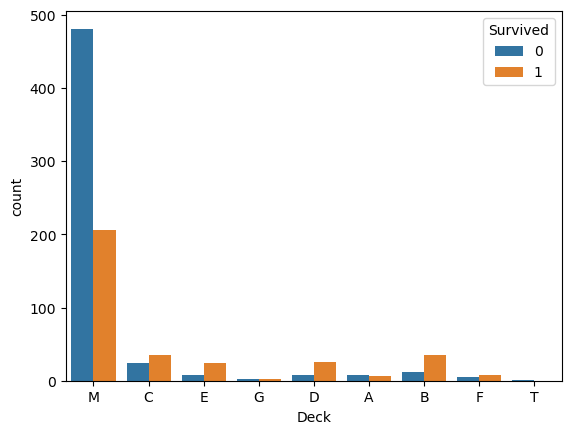

In [42]:
#x- Deck, y_Surived
sns.countplot(data = train, x= 'Deck', hue= 'Survived')
plt.show()

- M( 결측값)에서 상대적으로 사망률이 높다.
- Pclass와 Survived 컬럼의 관계확인(생존/ 사망 연관)

- C, E, D, B에서는 상대적으로 생존율이 좋다.

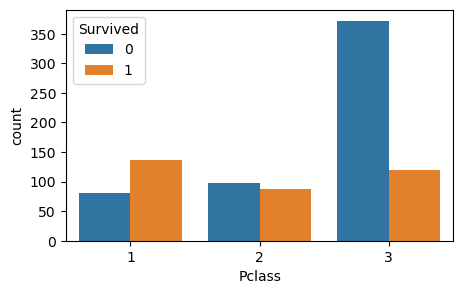

In [43]:
plt.figure(figsize=(5,3))
sns.countplot(data = train, x= 'Pclass',hue='Survived')
plt.show()

- 승객의 등급이 높을 수록 비교적 생존율이 높다
- 3등급의 승객들은 많이 사망함
- Deck과 Pclass의 시각화

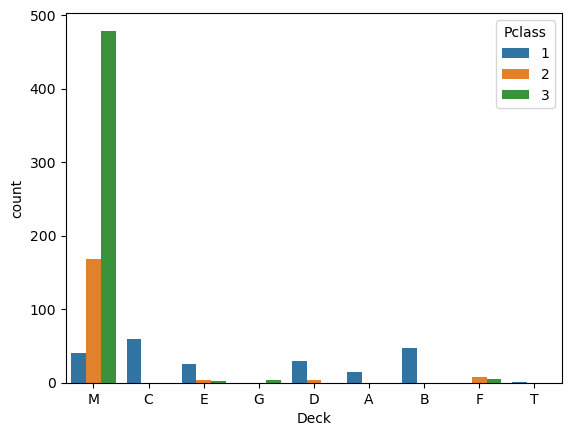

In [44]:
sns.countplot(data = train, x='Deck' ,hue= 'Pclass')
plt.show()

- M안에는 3등급의 사람들이 많아서 사망율이 높게 출력
- Sex와 Survived관계 확인해보기

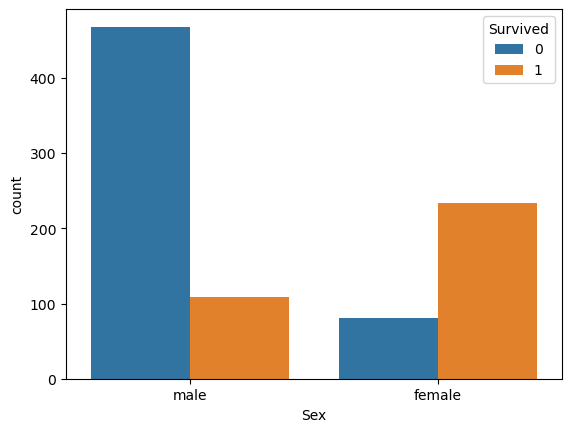

In [45]:
sns.countplot(data= train, x= 'Sex', hue='Survived')
plt.show()
# 올바르지 않은 사회 ,sns는 인생의 낭비다 

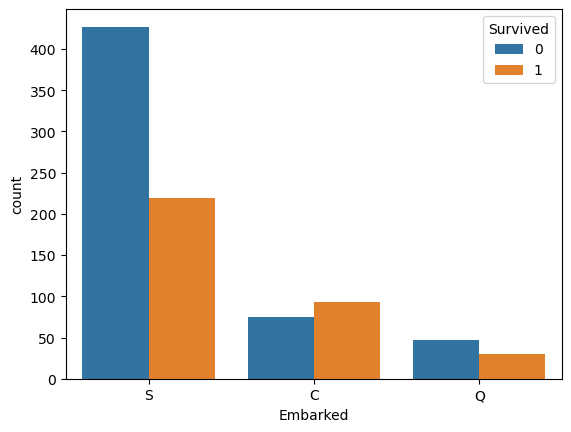

In [46]:
sns.countplot(data = train, x='Embarked', hue="Survived")
plt.show()

In [47]:
# Embared와 Pclass의 관계 확인


- Age에 따른 생존/사망 시각화
- 데이터의 분포를 확인할 때 여러가지 시각화 방법을 활용하는데, 그 중에 하나인 바이올린 플룻을 활용

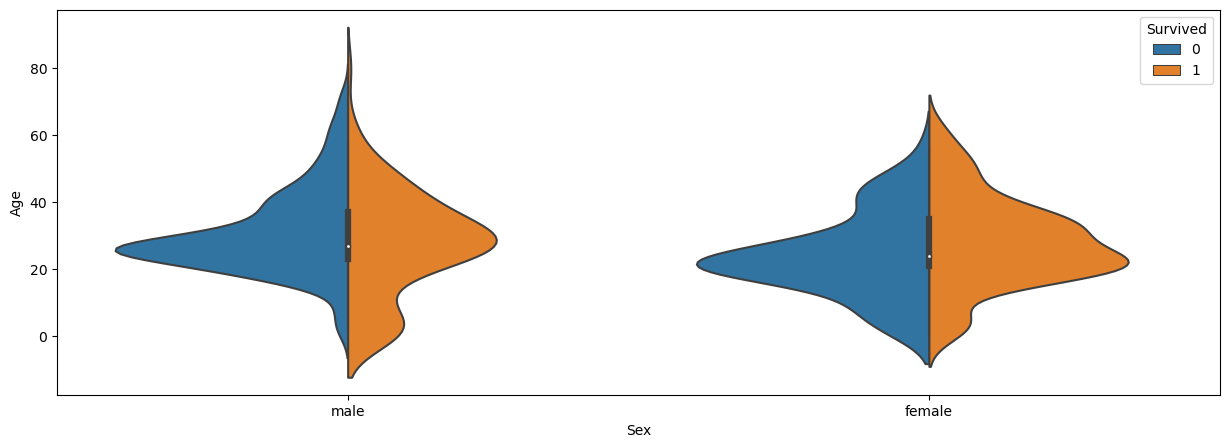

In [48]:
plt.figure(figsize=(15,5)) #x 15 y 5
sns.violinplot(data =train , x= 'Sex', y='Age', hue ='Survived', split=True)
plt.show()

- 20 대 ~ 40대 사이에 사망이 많았음.
- 어린아이 중에서는 남자가 더많았음.
- Fare에 따른 생존/ 사망 시각화

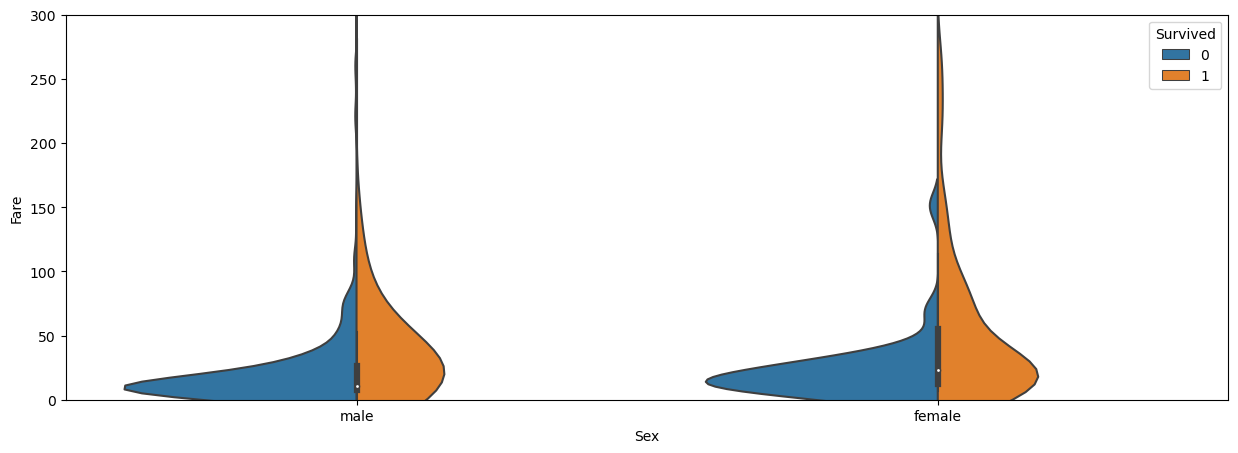

In [49]:
plt.figure(figsize=(15,5)) #x 15 y 5
sns.violinplot(data =train , x= 'Sex', y='Fare', hue ='Survived', split=True)
plt.ylim(0,300)
plt.show()

In [50]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [51]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Deck'],
      dtype='object')

####  가족의 수 컬럼 생성
- 기존을 가지고 새로운 컬럼을 생성(특성공학 분야중 1)
- 가족의 수: Sibsp(형제자매, 배우자) + Parch(부모, 자식) + 1(자신)
- train, test

In [52]:
train['family_Size'] = train['SibSp'] + train['Parch'] +1 

In [53]:
test['family_Size'] = test['SibSp'] + test['Parch'] +1 

In [54]:
train['family_Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: family_Size, Length: 891, dtype: int64

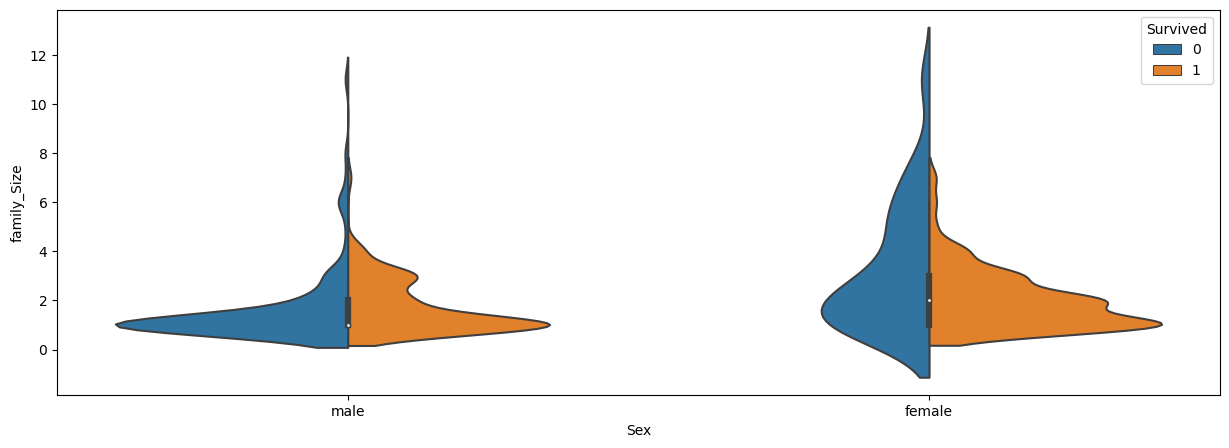

In [55]:
plt.figure(figsize=(15,5))
sns.violinplot(data = train, x="Sex", y="family_Size", hue ="Survived", split= True)
plt.show()

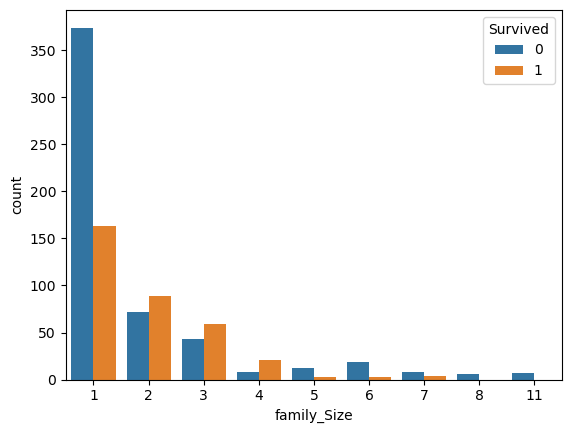

In [56]:
sns.countplot(data = train , x= 'family_Size', hue= 'Survived')
plt.show()

- 1명 일때는 사망 비율이 높고 2~4 일 때는 생존 비율이 높고, 5명 이상이면 사망 비율이 높음
- 사소한 관찰의 오류를 줄이기 위해서 범주를 줄여보자(binning)

In [57]:
# 가족의 수가 1이면 Alone # 2~4 명이면 small, 5명 이상이면 크다. Large

In [58]:
# train에 적용했으면 test에도 alone small large

In [59]:
user_label = ['Alone', 'Small', 'Large']
user_bins = [0, 1, 4, 11]
train['Family_Group'] = pd.cut(train['family_Size'], bins= user_bins, labels= user_label)

In [60]:
train['Family_Group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_Group, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [61]:
user_label = ['Alone', 'Small', 'Large']
user_bins = [0, 1, 4, 11]
test['Family_Group'] = pd.cut(test['family_Size'], bins= user_bins, labels= user_label)

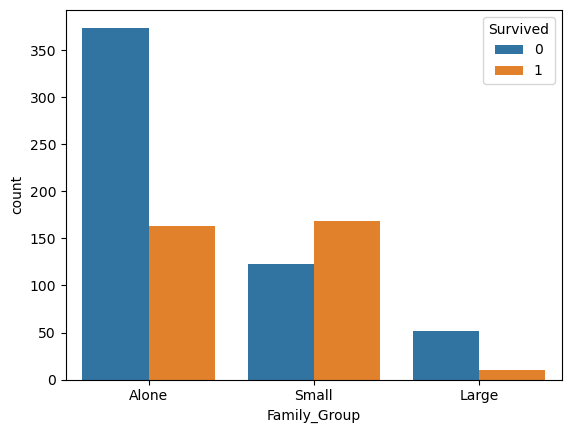

In [62]:
sns.countplot(data= train, x = "Family_Group" , hue="Survived")
plt.show()

####  불필요한 컬럼 삭제
- drop() 삭제할 이름이 있는 방향으로 axis (=1)를 설정
- 전처리 대상에서 제외되거나 , 전처리 후 불필요한 컬럼 삭제
- Ticket , Name, Family_Size만 삭제해보자
- Train도 삭제하면 test도 삭제해야 한다.

In [63]:
train.drop(['Ticket', 'Name', 'family_Size'], axis=1, inplace= True)

In [64]:
test.drop(['Ticket', 'Name', 'family_Size'], axis=1, inplace= True)


In [65]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_Group
PassengerId,,,,,,,,,,
1,0,3,male,22,1,0,7.2500,S,M,Small
2,1,1,female,38,1,0,71.2833,C,C,Small
3,1,3,female,26,0,0,7.9250,S,M,Alone
4,1,1,female,35,1,0,53.1000,S,C,Small
5,0,3,male,35,0,0,8.0500,S,M,Alone
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0000,S,M,Alone
888,1,1,female,19,0,0,30.0000,S,B,Alone
889,0,3,female,21,1,2,23.4500,S,M,Small


In [66]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_Group
PassengerId,,,,,,,,,
892,3,male,34,0,0,7.8292,Q,M,Alone
893,3,female,47,1,0,7.0000,S,M,Small
894,2,male,62,0,0,9.6875,Q,M,Alone
895,3,male,27,0,0,8.6625,S,M,Alone
896,3,female,22,1,1,12.2875,S,M,Small
...,...,...,...,...,...,...,...,...,...
1305,3,male,26,0,0,8.0500,S,M,Alone
1306,1,female,39,0,0,108.9000,C,C,Alone
1307,3,male,38,0,0,7.2500,S,M,Alone


In [67]:
# 훈련문제, 훈련답
X_train =  train.drop('Survived', axis= 1)
y_train =  train['Survived']
# 테스트 문제
X_test = test

In [68]:
# 범주형을 - > 원핫인코딩(수치)
# 인코딩 해야하는 컬럼 찾기
# 데이터 타입에 대한 질문으로 boolean 인덱싱
cat_filter = (X_train.dtypes != 'int64') & (X_train.dtypes != 'float64')
cat_choice = X_train.columns[cat_filter]
cat_choice

Index(['Sex', 'Embarked', 'Deck', 'Family_Group'], dtype='object')

In [69]:
X_train[cat_choice]

,Sex,Embarked,Deck,Family_Group
PassengerId,,,,
1,male,S,M,Small
2,female,C,C,Small
3,female,S,M,Alone
4,female,S,C,Small
5,male,S,M,Alone
...,...,...,...,...
887,male,S,M,Alone
888,female,S,B,Alone
889,female,S,M,Small


#### 원 핫인코딩 예시

In [70]:
# 원핫인코딩 함수 -> pd.get_dummies(대상)
X_train_ch_oh =pd.get_dummies(X_train[cat_choice])
# X_test 적용
X_test_ch_oh = pd.get_dummies(X_test[cat_choice])

In [71]:
fiX_train =pd.concat([X_train, X_train_ch_oh] , axis = 1)

In [72]:
fiX_test =pd.concat([X_test, X_test_ch_oh] , axis = 1)

In [73]:
fiX_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Pclass              891 non-null    int64   
 1   Sex                 891 non-null    object  
 2   Age                 891 non-null    int64   
 3   SibSp               891 non-null    int64   
 4   Parch               891 non-null    int64   
 5   Fare                891 non-null    float64 
 6   Embarked            891 non-null    object  
 7   Deck                891 non-null    object  
 8   Family_Group        891 non-null    category
 9   Sex_female          891 non-null    uint8   
 10  Sex_male            891 non-null    uint8   
 11  Embarked_C          891 non-null    uint8   
 12  Embarked_Q          891 non-null    uint8   
 13  Embarked_S          891 non-null    uint8   
 14  Deck_A              891 non-null    uint8   
 15  Deck_B              891 non-null    uint

In [74]:
# CAT_choice 삭제
fiX_train.drop(cat_choice, axis = 1, inplace= True)
fiX_test.drop(cat_choice, axis = 1, inplace= True)

In [75]:
fiX_train.shape
fiX_test.shape

(418, 21)

In [76]:
# set() 자료형
# 집합
# 합집합, 교집합 , 차집합
# 중복 x , 순서 x
# 중복을 허용하지 않는 set 특징은 자료형의 중복을 제거하기 위한 필터 역할로 종종 사용
# 요소의 여부를 확인하기 위해서도 종종 사용
# 인덱싱으로 데이터에 접근하기 위해서는 리스트나 튜플로 형변환 사용해야 함
set(fiX_train.columns) - set(fiX_test.columns)

{'Deck_T'}

In [77]:
# list(set(X_train.columns))
fiX_test['Deck_T'] = 0
fiX_test.shape

(418, 22)

In [78]:
display(fiX_train.columns)
display(fiX_test.columns)
#X_test컬럼순서를 X_train 컬럼 순서대로 맞추기
fiX_test =fiX_test[fiX_train.columns]

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'Family_Group_Alone', 'Family_Group_Small', 'Family_Group_Large'],
      dtype='object')

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Deck_T'],
      dtype='object')

### 모델링
- 모델 선택 및 하이퍼 파라미터
- 모델 학습
- 모델 예측 및 평가 -> kaggle 사이트에 업로드

In [79]:
# tree 분류
tree_model = DecisionTreeClassifier()

In [80]:
# 학습 시키기
tree_model.fit(fiX_train, y_train)
pred= tree_model.predict(fiX_test)
pred
# 정확도 점수를 확인하기 위해서 kaggle 제출 하기 
sub = pd.read_csv("data/titanic/gender_submission.csv")
sub
sub['Survived']= pred
sub.to_csv("my_answer01.csv" , index = False)



In [81]:
#tree 모델 깊이 조정
tree_model5= DecisionTreeClassifier(max_depth=5)
from sklearn.model_selection import cross_val_score
result =cross_val_score(tree_model5, fiX_train, y_train, cv = 5)
print(result.mean())

0.811436821291821


In [82]:
# 추후 max_depth, min_sampes_split, max_leaf_nodes, min_samples_leaf 등을 통해
# 어떤 파라미터 값의 조합이 좋을지 찾아주는 방법을 연결해볼 수 있음.(그리드 서치)

In [83]:
# 학습 시키기
tree_model5.fit(fiX_train, y_train)
pred= tree_model5.predict(fiX_test)
pred
# 정확도 점수를 확인하기 위해서 kaggle 제출 하기 
sub = pd.read_csv("data/titanic/gender_submission.csv")
sub
sub['Survived']= pred
sub.to_csv("my_answer02.csv" , index = False)

### 파일 내보내기
- 분석에 사용한 파일 csv로 내보내기
- 새로운 파일에 적용하기위해

In [84]:
fiX_train.to_csv("X_train.csv", index = False)
fiX_test.to_csv("X_test.csv", index = False)
y_train.to_csv("Y_train.csv", index = False)